In [1]:
import pandas as pd

df = pd.read_excel("/content/SY Data.xlsx", header = 1)
#print(df)
df.head()

,Sr No,PRN No,Student Name,Year,Academic Year,Semester,Pattern,Division,Course Code,Course Name,Gender
0,1,124B1B034,TALREJA TANMAY DEVANAND,SY,2025-26,1,2023,A,BSH23OE06,Open Elective : Neural Network and Fuzzy Logic...,Male
1,2,124B1B067,KURSANGE YASH SANTOSH,SY,2025-26,1,2023,A,BSH23OE06,Open Elective : Neural Network and Fuzzy Logic...,Male
2,3,124B1B174,ZAREKAR SIDDHI KISHOR,SY,2025-26,1,2023,C,BSH23OE06,Open Elective : Neural Network and Fuzzy Logic...,Female
3,4,124B1B080,MEHUL SRINIVAS PYATI,SY,2025-26,1,2023,B,BSH23OE06,Open Elective : Neural Network and Fuzzy Logic...,Male
4,5,124B1B309,GHULE VEDANT BABASAHEB,SY,2025-26,1,2023,B,BSH23OE06,Open Elective : Neural Network and Fuzzy Logic...,Male


In [2]:
df.shape

(900, 11)

In [8]:
df.columns

Index(['Sr No', 'PRN No', 'Student Name', 'Year', 'Academic Year', 'Semester',
       'Division', 'Course Code', 'Course Name', 'Gender'],
      dtype='object')

In [3]:
df.describe()

,Sr No,Semester
count,900.000000,900.0
mean,172.921111,1.0
std,138.368675,0.0
min,1.000000,1.0
25%,57.000000,1.0
50%,131.500000,1.0
75%,267.250000,1.0
max,492.000000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sr No          900 non-null    int64 
 1   PRN No         900 non-null    object
 2   Student Name   900 non-null    object
 3   Year           900 non-null    object
 4   Academic Year  900 non-null    object
 5   Semester       900 non-null    int64 
 6   Pattern        775 non-null    object
 7   Division       900 non-null    object
 8   Course Code    900 non-null    object
 9   Course Name    900 non-null    object
 10  Gender         900 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.5+ KB


In [5]:
print(df.isnull().sum())

Sr No              0
PRN No             0
Student Name       0
Year               0
Academic Year      0
Semester           0
Pattern          125
Division           0
Course Code        0
Course Name        0
Gender             0
dtype: int64


In [6]:
df = df.dropna(axis=1, how='any')
print(df.isnull().sum())

Sr No            0
PRN No           0
Student Name     0
Year             0
Academic Year    0
Semester         0
Division         0
Course Code      0
Course Name      0
Gender           0
dtype: int64


In [7]:
df = df.drop_duplicates()
print(df)

     Sr No     PRN No              Student Name Year Academic Year  Semester  \
0        1  124B1B034   TALREJA TANMAY DEVANAND   SY       2025-26         1   
1        2  124B1B067     KURSANGE YASH SANTOSH   SY       2025-26         1   
2        3  124B1B174     ZAREKAR SIDDHI KISHOR   SY       2025-26         1   
3        4  124B1B080      MEHUL SRINIVAS PYATI   SY       2025-26         1   
4        5  124B1B309    GHULE VEDANT BABASAHEB   SY       2025-26         1   
..     ...        ...                       ...  ...           ...       ...   
895     53  124B1G082    RAJPUT SOHAM INDRASING   SY       2025-26         1   
896     54  124B1G071      MALUSARE NILAY UTTAM   SY       2025-26         1   
897     55  124B1G120          GUNJAL ANUJ ANIL   SY       2025-26         1   
898     56  124B1G141        BHOSALE YASH VIJAY   SY       2025-26         1   
899     57  124B1G135  WAGHMARE ADITYA RAMKISAN   SY       2025-26         1   

    Division Course Code               

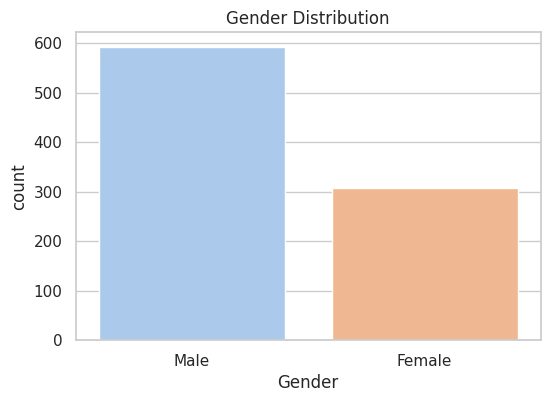

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title('Gender Distribution')
plt.show()

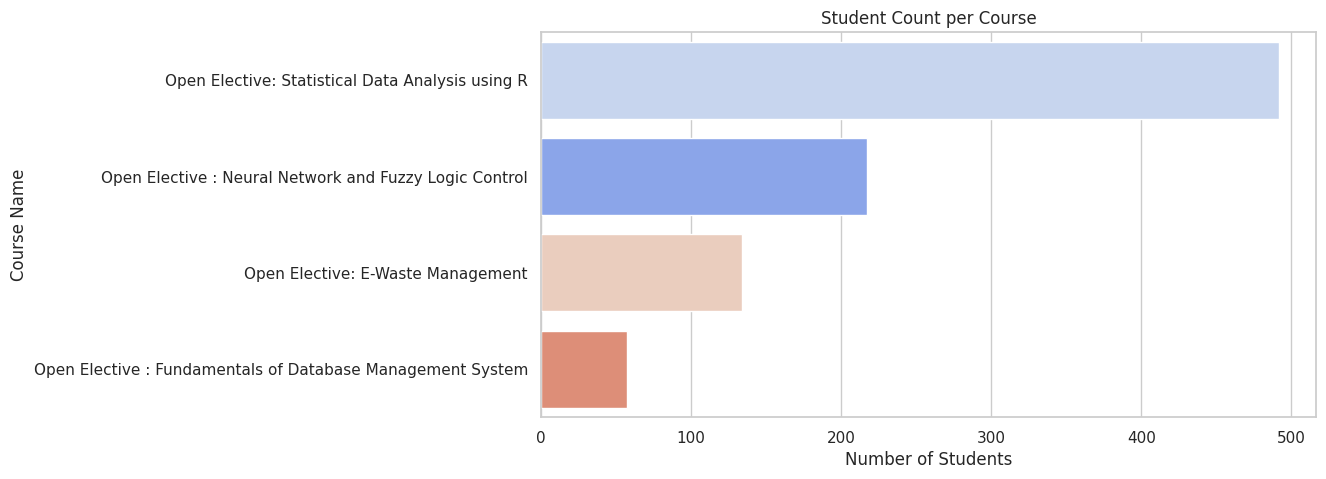

In [16]:
# Students per Course
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Course Name', hue='Course Name', order=df['Course Name'].value_counts().index, palette='coolwarm', legend=False)
plt.title('Student Count per Course')
plt.xlabel('Number of Students')
plt.ylabel('Course Name')
plt.show()

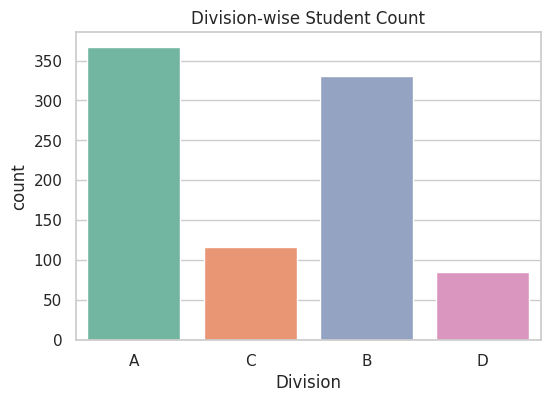

In [17]:
# Division-wise Student Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Division', hue='Division', palette='Set2', legend=False)
plt.title('Division-wise Student Count')
plt.show()

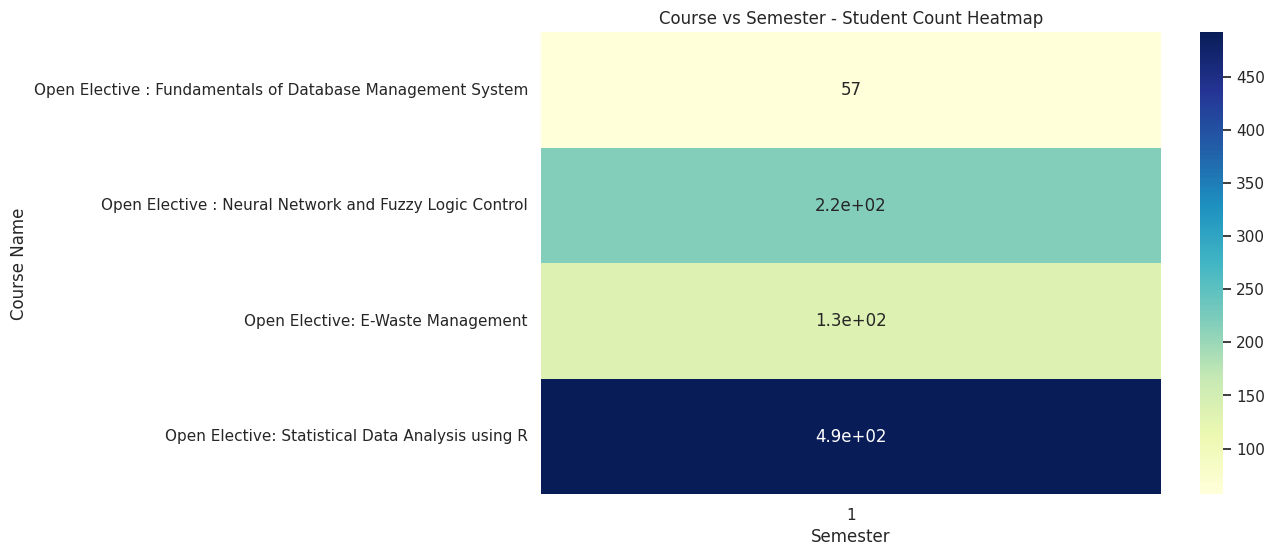

In [18]:
# Heatmap
pivot = df.pivot_table(index='Course Name', columns='Semester', values='PRN No', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Course vs Semester - Student Count Heatmap')
plt.show()